# PCA_and_Label_Encoding_Notebook

In this notebook I want to see the difference between two aspects of this dataset that are giving me some difficulty:
1. Label Encoding vs. One Hot Encoding
2. PCA vs. Feature Importance

# Libraries

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import folium
import datetime as dt

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import (train_test_split, 
                                     cross_val_score,
                                    GridSearchCV)

from sklearn.metrics import (accuracy_score, 
                            f1_score, 
                            confusion_matrix, 
                            classification_report,
                            confusion_matrix)

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import SGDClassifier

import xgboost as xgb

# Data

In [12]:
# Load the data
df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
# The data is all categorical!

# EDA

I'm going to skip the EDA in this Notebook since it's all in the other one!

# Converting Categorical Data

In [27]:
# Encoding all the variables...
data = df.copy()
encoder_x = LabelEncoder()
for col in data.columns:
    data[col] = encoder_x.fit_transform(data[col])
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


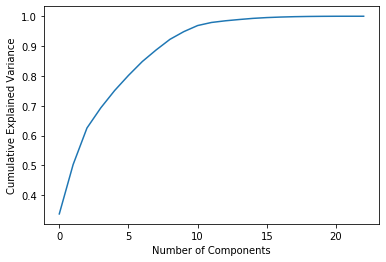

In [28]:
# How many components?
from sklearn.decomposition import PCA
pca = PCA().fit(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

In [23]:
# Which way is better?  This is what I could write my blog about!!!!

In [24]:
# That and PCA vs feature importance???

Both methods reduce dimensionality (# of predictors).

PCA combines similar (correlated) attributes and creates new ones. Superior to original attributes.

Feature selection doesn't combine attributes. Just evaluates their quality, predictive power and select the best set.

Benefit in PCA is that combination of N attributes is better than any individual attribute. Disadvantage is in harder explanation what exactly that PCA component means.

You can combine both methods: Create PCA components and then run feature selection.

In business consulting I'm not using PCA at all, just FS. Sacrificing a bit of predictive power to get more understandable model is my proven strategy.

-Jozo Kovac, former Cofounder, CTO at Exponea (2015-2018)

In [29]:
# Drop target and set the dependent values variables 
X = data.drop('class', axis=1)
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [30]:
y = data['class']
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

# Test/Train Split

In [139]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [28]:
# PCA ? Principal component analysis

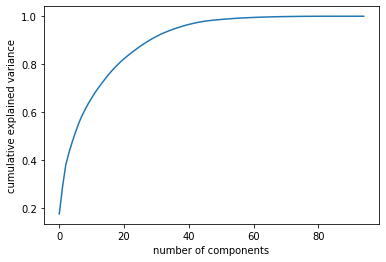

In [132]:
# How many components?
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

In [168]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 9)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Models

In [31]:
# Create decision tree classifer object
clf = RandomForestClassifier()

# Train model
model = clf.fit(X, y)

In [32]:
# Calculate feature importances
importances = model.feature_importances_

In [37]:
df_encoded = X.fit_transform(X)

AttributeError: 'DataFrame' object has no attribute 'fit_transform'

In [34]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

KeyError: 4

In [147]:
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

AttributeError: 'RandomForestClassifier' object has no attribute 'coef_'

In [190]:
# Create a list to store the results of each model
valscore = []
models = ['Logistic Regression Model',
          'Random Forest Model',
          'XGBoost Model',
          'KNN Model',
          'Support Vector Model',
          'Stochastic Decent Model']

## Logistic Regression Model

In [191]:
# Log model
log_clf = LogisticRegression(random_state=123)
log_model = log_clf.fit(X_train, y_train)

log_training_preds = log_clf.predict(X_train)
log_training_accuracy = accuracy_score(y_train, log_training_preds)

log_val_preds = log_clf.predict(X_test)
log_val_accuracy = accuracy_score(y_test, log_val_preds)
valscore.append(log_val_accuracy)

print("Log Training Accuracy: {:.4}%".format(log_training_accuracy * 100))
print("Log Validation Accuracy: {:.4}%".format(log_val_accuracy * 100))

Log Training Accuracy: 97.64%
Log Validation Accuracy: 97.0%


In [192]:
# Classification report, precision and recall
print(classification_report(y_test, log_val_preds))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1069
           1       0.97      0.97      0.97       962

    accuracy                           0.97      2031
   macro avg       0.97      0.97      0.97      2031
weighted avg       0.97      0.97      0.97      2031



In [193]:
# Confusion matrix 
log_matrix = confusion_matrix(y_test, log_val_preds)
print('Confusion Matrix:\n', log_matrix)

Confusion Matrix:
 [[1041   28]
 [  33  929]]


## Random Forest Model

In [194]:
# Forest Model
forest_clf = RandomForestClassifier()
forest_model = forest_clf.fit(X_train, y_train)

forest_training_preds = forest_clf.predict(X_train)
forest_training_accuracy = accuracy_score(y_train, forest_training_preds)

forest_val_preds = forest_clf.predict(X_test) # y_hat
forest_val_accuracy = accuracy_score(y_test, forest_val_preds)
valscore.append(forest_val_accuracy)

print("Forest Training Accuracy: {:.4}%".format(forest_training_accuracy * 100))
print("Forest Validation accuracy: {:.4}%".format(forest_val_accuracy * 100))

Forest Training Accuracy: 100.0%
Forest Validation accuracy: 99.95%


In [195]:
# Classification report
print(classification_report(y_test, forest_val_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1069
           1       1.00      1.00      1.00       962

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [196]:
# Confusion matrix 
forest_matrix = confusion_matrix(y_test, forest_val_preds)
print('Confusion Matrix:\n', forest_matrix)

Confusion Matrix:
 [[1069    0]
 [   1  961]]


## XGBoost Model

In [197]:
# XGB classifier
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)

xgb_training_preds = xgb_clf.predict(X_train)
xgb_training_accuracy = accuracy_score(y_train, xgb_training_preds)

xgb_val_preds = xgb_clf.predict(X_test)
xgb_val_accuracy = accuracy_score(y_test, xgb_val_preds)
valscore.append(xgb_val_accuracy)

print("XGB Training Accuracy: {:.4}%".format(xgb_training_accuracy * 100))
print("XGB Validation accuracy: {:.4}%".format(xgb_val_accuracy * 100))

XGB Training Accuracy: 99.95%
XGB Validation accuracy: 99.66%


In [198]:
# XGB classification report
print(classification_report(y_test, xgb_val_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1069
           1       1.00      1.00      1.00       962

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [199]:
# Regular confusion matrix
xgb_matrix = confusion_matrix(y_test, xgb_val_preds)
print('Confusion Matrix:\n', xgb_matrix)

Confusion Matrix:
 [[1066    3]
 [   4  958]]


## KNN Model

In [200]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

knn_training_preds = knn_clf.predict(X_train)
knn_training_accuracy = accuracy_score(y_train, knn_training_preds)

knn_val_preds = knn_clf.predict(X_test)
knn_val_accuracy = accuracy_score(y_test, knn_val_preds)
valscore.append(knn_val_accuracy)

print("KNN Training Accuracy: {:.4}%".format(knn_training_accuracy * 100))
print("KNN Validation accuracy: {:.4}%".format(knn_val_accuracy * 100))

KNN Training Accuracy: 99.98%
KNN Validation accuracy: 99.95%


In [201]:
# KNN classification report
print(classification_report(y_test, knn_val_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1069
           1       1.00      1.00      1.00       962

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [202]:
# Regular confusion matrix
knn_matrix = confusion_matrix(y_test, knn_val_preds)
print('Confusion Matrix:\n', knn_matrix)

Confusion Matrix:
 [[1068    1]
 [   0  962]]


## Support Vector Model - SVC

In [203]:
svc_clf = SVC()
svc_clf.fit(X_train, y_train)

svc_training_preds = svc_clf.predict(X_train)
svc_training_accuracy = accuracy_score(y_train, svc_training_preds)

svc_val_preds = svc_clf.predict(X_test)
svc_val_accuracy = accuracy_score(y_test, svc_val_preds)
valscore.append(svc_val_accuracy)

print("SVC Training Accuracy: {:.4}%".format(svc_training_accuracy * 100))
print("SVC Validation accuracy: {:.4}%".format(svc_val_accuracy * 100))

SVC Training Accuracy: 99.97%
SVC Validation accuracy: 99.9%


In [204]:
# SVC classification report
print(classification_report(y_test, svc_val_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1069
           1       1.00      1.00      1.00       962

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [205]:
# Regular confusion matrix
svc_matrix = confusion_matrix(y_test, svc_val_preds)
print('Confusion Matrix:\n', svc_matrix)

Confusion Matrix:
 [[1069    0]
 [   2  960]]


## Stochastic Gradient Decent Model

In [206]:
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)

sgd_training_preds = sgd_clf.predict(X_train)
sgd_training_accuracy = accuracy_score(y_train, svc_training_preds)

sgd_val_preds = sgd_clf.predict(X_test)
sgd_val_accuracy = accuracy_score(y_test, sgd_val_preds)
valscore.append(sgd_val_accuracy)

print("Stochastic GD Training Accuracy: {:.4}%".format(sgd_training_accuracy * 100))
print("Stochastic GD Validation accuracy: {:.4}%".format(sgd_val_accuracy * 100))

Stochastic GD Training Accuracy: 99.97%
Stochastic GD Validation accuracy: 97.44%


In [207]:
# Stochastic classification report
print(classification_report(y_test, sgd_val_preds))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1069
           1       0.99      0.96      0.97       962

    accuracy                           0.97      2031
   macro avg       0.98      0.97      0.97      2031
weighted avg       0.97      0.97      0.97      2031



In [208]:
# Regular confusion matrix
sgd_matrix = confusion_matrix(y_test, sgd_val_preds)
print('Confusion Matrix:\n', sgd_matrix)

Confusion Matrix:
 [[1056   13]
 [  39  923]]


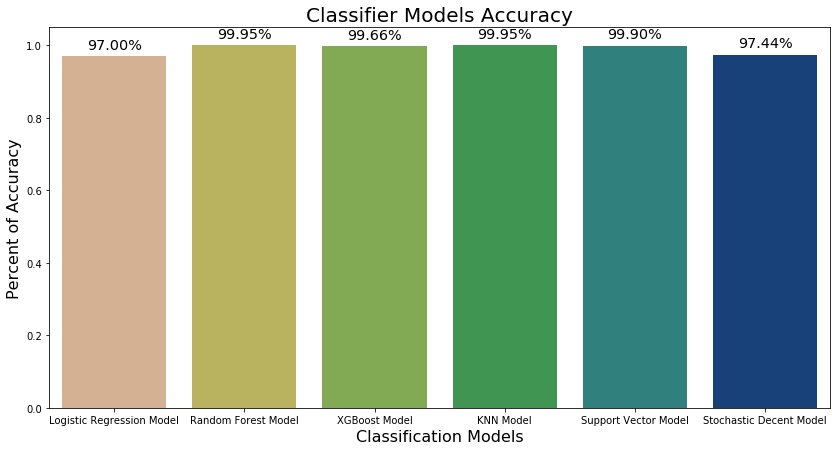

In [209]:
# Visualising the accuracy score of each classification model
plt.figure(figsize=(14,7))
ax = sns.barplot(x=models, y=valscore, palette = "gist_earth_r", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 16)
plt.ylabel("Percent of Accuracy", fontsize = 16)
plt.title("Classifier Models Accuracy", fontsize = 20)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

# Summary

Something is very wrong with my models... since they are all getting 100%. This means they are over-fitting. What can I do to correct this?

# Future Work

I would love to go find some mushrooms around my house and categorize them in order to determine if they are poisonous or not! For now I just need to work on fixing my models.